## Import Necessary Libraries

In [1]:
# Importing and loading necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import mean_squared_error
from scipy.stats import t
from tabulate import tabulate

In [2]:
# Importing data
data = pd.read_csv('/content/CC GENERAL.csv')
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
# Viewing data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
# Checking for any null values
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [5]:
data.drop('MINIMUM_PAYMENTS',axis=1,inplace=True)

In [6]:
data.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [7]:
print("Descriptive Statistics:\n")
data.describe()

Descriptive Statistics:



,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,1.000000,12.000000


## Statistical Analysis:

In [8]:

data_copy = data.copy()
data_copy.drop('CUST_ID',axis=1,inplace=True)



In [9]:
def calculate_statistical_moments(data_copy):
    """
    Calculate statistical moments (mean, median, standard deviation, skewness, kurtosis) for each feature in the dataset.

    Parameters:
    - data_copy (DataFrame): Input data_copy containing features.

    Returns:
    - DataFrame: DataFrame containing statistical moments for each feature.
    """
    moments = {
        'Mean': data_copy.mean(),
        'Median': data_copy.median(),
        'Standard Deviation': data_copy.std(),
        'Skewness': data_copy.skew(),
        'Kurtosis': data_copy.kurtosis()
    }
    return pd.DataFrame(moments)

def display_statistical_moments(data_copy):
    """
    Display statistical moments (mean, median, standard deviation, skewness, kurtosis) for each feature in the dataset.

    Parameters:
    - data_copy (DataFrame): Input data_copy containing features.
    """
    moments_df = calculate_statistical_moments(data_copy)
    print("\nStatistical Moments:\n")
    print(tabulate(moments_df, headers='keys', tablefmt='grid', showindex=True, numalign="center", stralign='center'))

display_statistical_moments(data_copy)


Statistical Moments:

+----------------------------------+----------+----------+----------------------+------------+------------+
|                                  |   Mean   |  Median  |  Standard Deviation  |  Skewness  |  Kurtosis  |
+==================================+==========+==========+======================+============+============+
|             BALANCE              | 1564.47  | 873.385  |       2081.53        |  2.39339   |  7.67475   |
+----------------------------------+----------+----------+----------------------+------------+------------+
|        BALANCE_FREQUENCY         | 0.877271 |    1     |       0.236904       |  -2.02327  |  3.09237   |
+----------------------------------+----------+----------+----------------------+------------+------------+
|            PURCHASES             |  1003.2  |  361.28  |       2136.63        |  8.14427   |  111.389   |
+----------------------------------+----------+----------+----------------------+------------+------------+
|    

In [10]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [11]:
# Checking the skew of the data
data_copy.skew()

BALANCE                              2.393386
BALANCE_FREQUENCY                   -2.023266
PURCHASES                            8.144269
ONEOFF_PURCHASES                    10.045083
INSTALLMENTS_PURCHASES               7.299120
CASH_ADVANCE                         5.166609
PURCHASES_FREQUENCY                  0.060164
ONEOFF_PURCHASES_FREQUENCY           1.535613
PURCHASES_INSTALLMENTS_FREQUENCY     0.509201
CASH_ADVANCE_FREQUENCY               1.828686
CASH_ADVANCE_TRX                     5.721298
PURCHASES_TRX                        4.630655
CREDIT_LIMIT                         1.522464
PAYMENTS                             5.907620
PRC_FULL_PAYMENT                     1.942820
TENURE                              -2.943017
dtype: float64

## Scatter Plot

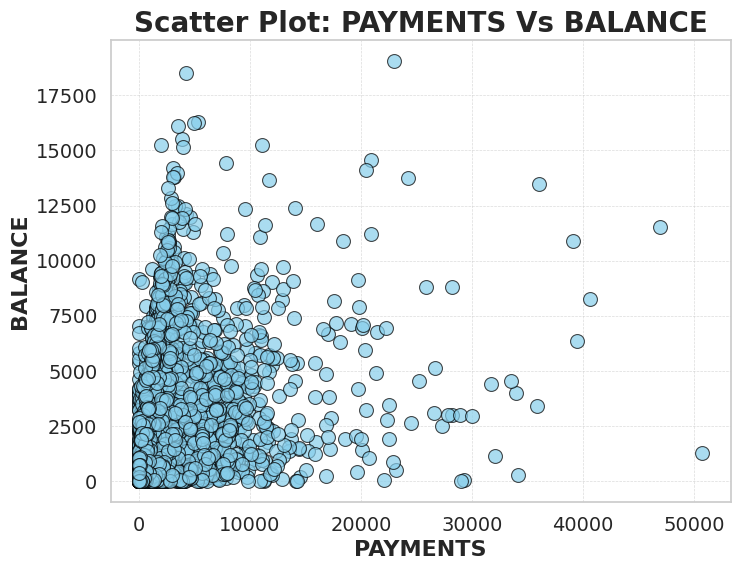

In [28]:
def scatter_plot(data, x_col, y_col, title):
    """
    Plot a scatter plot with a different style and design.

    Parameters:
    - data (DataFrame): Input data
    - x_col (str): Column name for x-axis
    - y_col (str): Column name for y-axis
    - title (str): Title of the plot
    """
    # Set style
    sns.set(style='whitegrid', font_scale=1.2)

    # Create scatter plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data, x=x_col, y=y_col, color='skyblue', edgecolor='black', s=100, alpha=0.7)

    # Set title and labels
    plt.title(title, fontsize=20, fontweight='bold')
    plt.xlabel(x_col, fontsize=16, fontweight='bold')
    plt.ylabel(y_col, fontsize=16, fontweight='bold')

    # Increase tick label font size
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    # Add grid
    plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

    plt.show()

# Example usage
scatter_plot(data_copy_filled, 'PAYMENTS', 'BALANCE', 'Scatter Plot: PAYMENTS Vs BALANCE')


## HeatMap

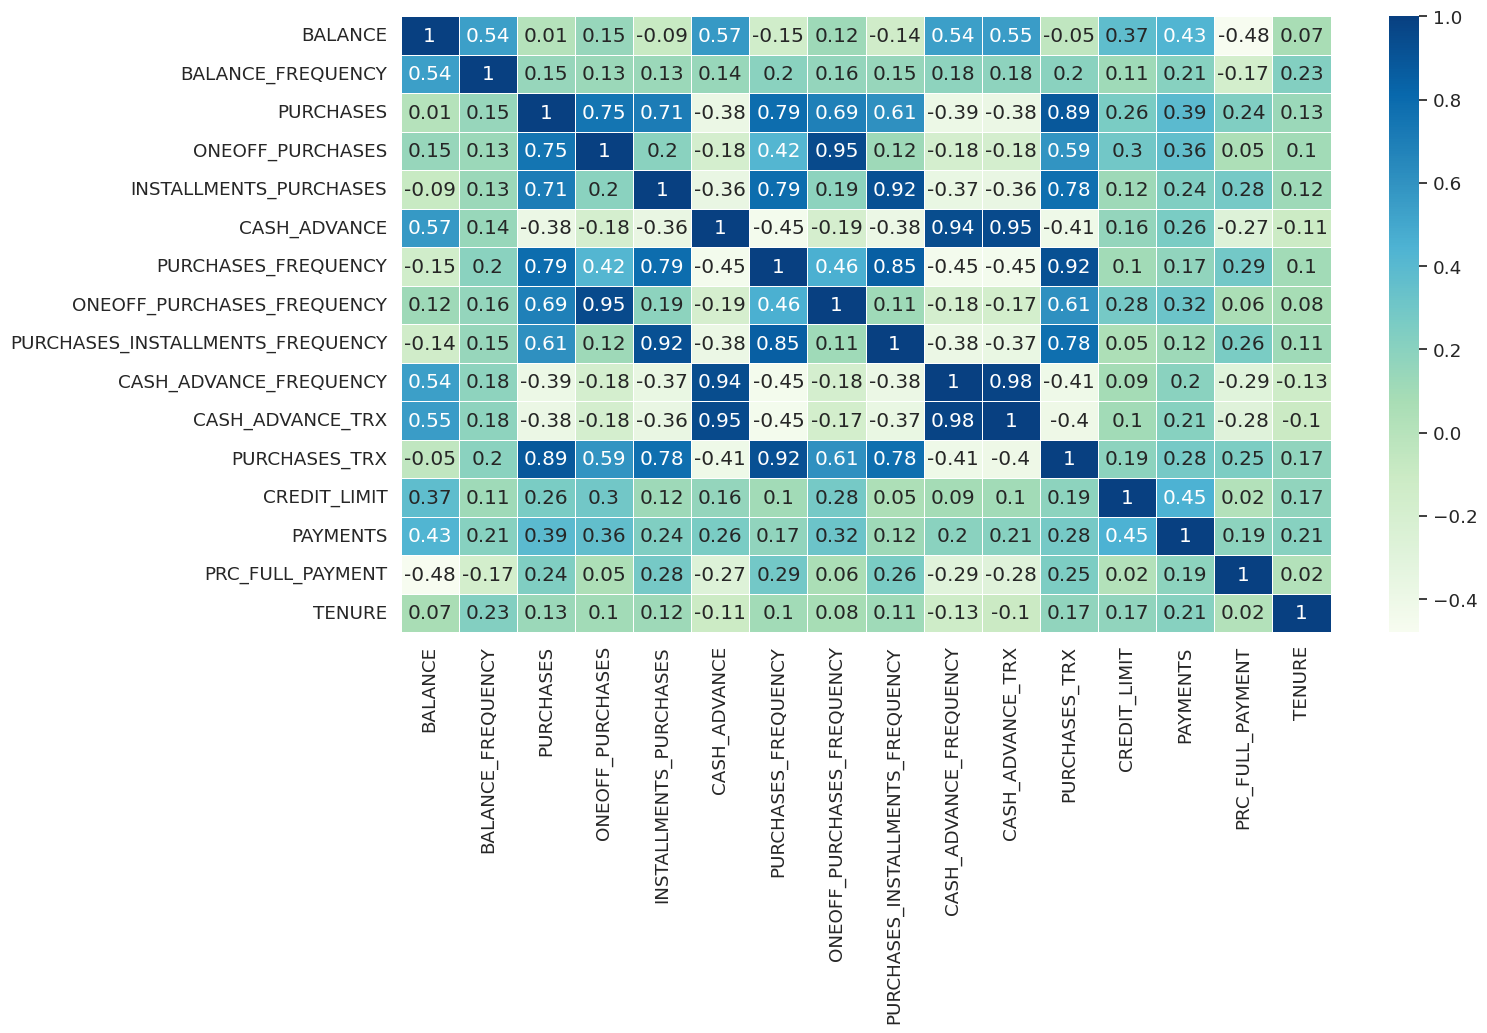

In [31]:
numerical_features = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
        'PRC_FULL_PAYMENT', 'TENURE']

plt.figure(figsize=(15, 8))
sns.heatmap(round(data[numerical_features].corr(method='spearman'), 2),
            annot=True, mask=None, cmap='GnBu',linewidth=0.5)
plt.show()

# Histogram

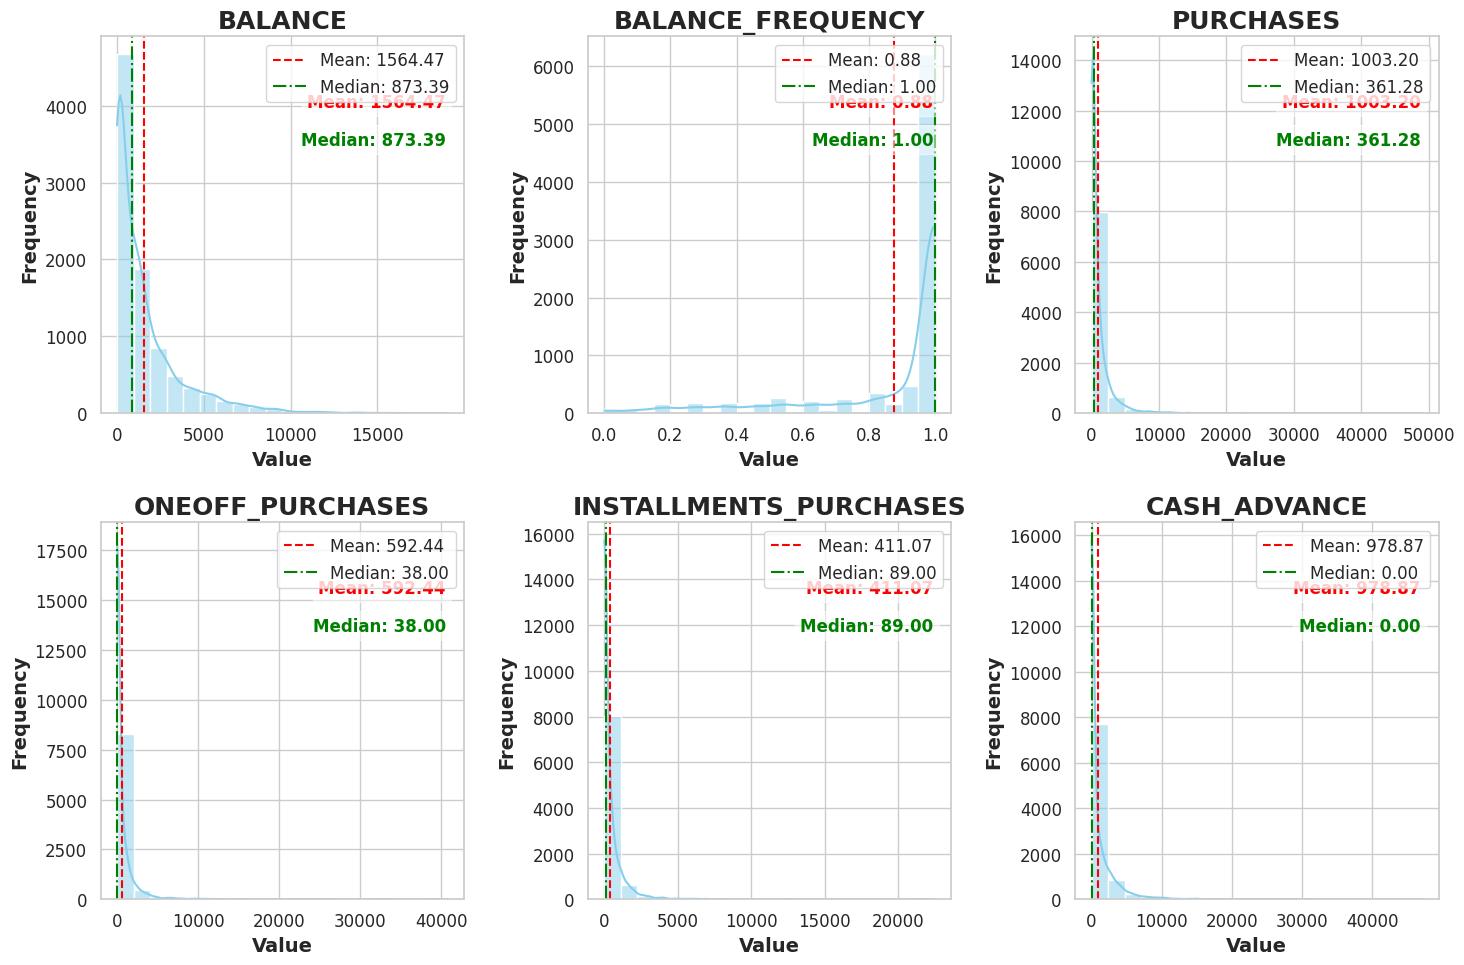

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_histograms(data):
    """
    Plot histograms of features to view data distribution.

    Parameters:
    - data (DataFrame): Input data
    """
    # Select only the top 6 names
    top_names = data.columns[:6]
    top_data = data[top_names]

    # Set style
    sns.set(style='whitegrid', font_scale=1.5, rc={'figure.figsize':(15, 10)})

    # Create subplots
    fig, axes = plt.subplots(nrows=2, ncols=3)
    fig.subplots_adjust(hspace=0.5, wspace=0.3)
    ax_flat = axes.flatten()

    # Plot histograms for each feature
    for i, col in enumerate(top_data.columns):
        ax = sns.histplot(top_data[col], bins=20, kde=True, color='skyblue', ax=ax_flat[i])
        ax.set_title(col, fontsize=18, fontweight='bold')
        ax.set_xlabel('Value', fontsize=14, fontweight='bold')
        ax.set_ylabel('Frequency', fontsize=14, fontweight='bold')
        ax.tick_params(axis='both', which='major', labelsize=12)

        # Add mean and median lines
        mean_val = top_data[col].mean()
        median_val = top_data[col].median()
        ax.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
        ax.axvline(median_val, color='green', linestyle='-.', label=f'Median: {median_val:.2f}')

        # Add legend
        ax.legend(loc='upper right', fontsize=12)

        # Add annotation for mean and median
        ax.text(0.95, 0.85, f'Mean: {mean_val:.2f}', verticalalignment='top', horizontalalignment='right',
                transform=ax.transAxes, color='red', fontsize=12, fontweight='bold', bbox=dict(facecolor='white', alpha=0.5))
        ax.text(0.95, 0.75, f'Median: {median_val:.2f}', verticalalignment='top', horizontalalignment='right',
                transform=ax.transAxes, color='green', fontsize=12, fontweight='bold', bbox=dict(facecolor='white', alpha=0.5))

    plt.tight_layout()
    plt.show()

# Example usage
plot_histograms(data_copy)


In [14]:
data_copy.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

## Preprocessing

In [15]:
data_copy.dropna()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,0.250000,6


In [16]:
data_copy_filled = data_copy.fillna(0)

In [17]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(data_copy_filled)
df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.52897879,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.81864213,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.38380474,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.5706145 ,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.58053567,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.57686873,
        -0.52555097, -4.12276757]])

## Elbow Method and K-Means Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

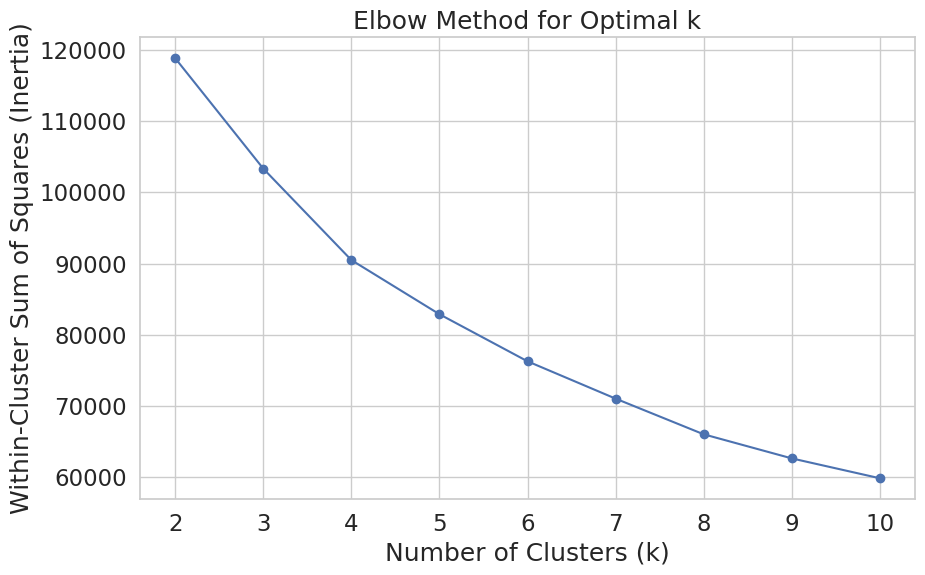

In [18]:
# Extract features for clustering (exclude the 'quality' column)

# Initialize lists to store inertia values
inertia_values = []

# Test different values of k (number of clusters)
k_values = range(2, 11)  # Test k from 2 to 10

for k in k_values:
    # Create KMeans clustering model
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)

    # Append the inertia value to the list
    inertia_values.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_values)
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


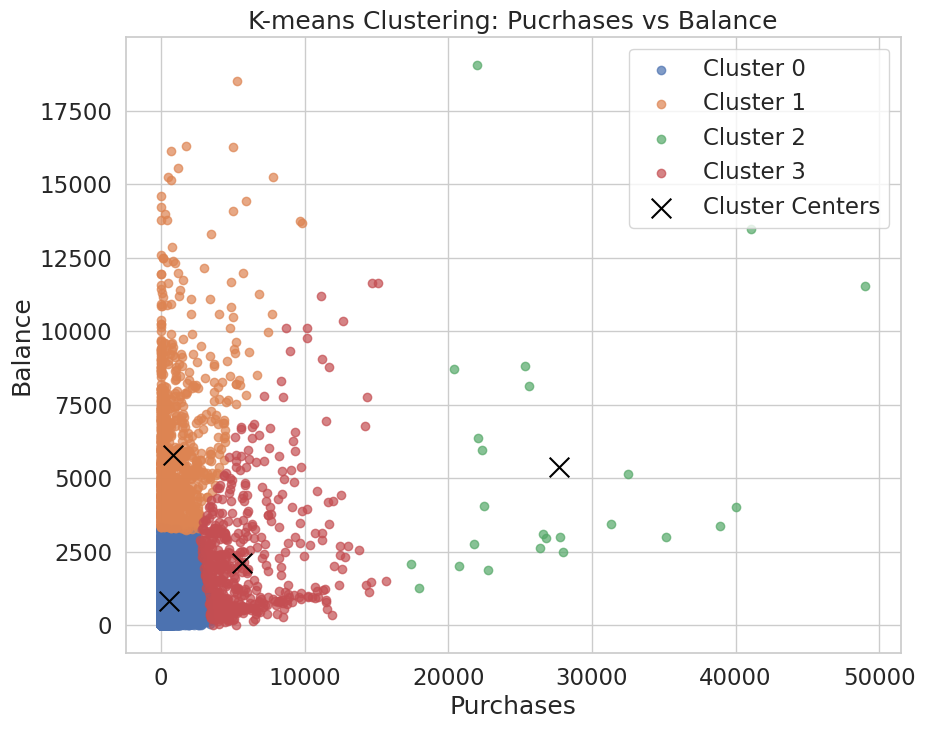

In [19]:
# Perform K-means clustering
km = KMeans(n_clusters=4, random_state=42)  # Specify the number of clusters
data_copy_filled['cluster'] = km.fit_predict(data_copy_filled[['PURCHASES', 'BALANCE']])  # Fit K-means and assign cluster labels

# Plot clusters with cluster centers
plt.figure(figsize=(10, 8))

# Plot each cluster using a different color
for cluster_label in sorted(data_copy_filled['cluster'].unique()):
    cluster_data = data_copy_filled[data_copy_filled['cluster'] == cluster_label]
    plt.scatter(cluster_data['PURCHASES'], cluster_data['BALANCE'], label=f'Cluster {cluster_label}', alpha=0.7)

# Plot cluster centers
cluster_centers = km.cluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', s=200, c='black', label='Cluster Centers')

# Set plot title and labels
plt.title('K-means Clustering: Pucrhases vs Balance')
plt.xlabel('Purchases')
plt.ylabel('Balance')

# Add legend
plt.legend()
plt.grid(True)
#plt.savefig('6.png', dpi=300)
plt.show()

In [21]:
def evaluate_fitting(data, x_feature, y_feature, model):
    """
    Evaluate the quality of linear regression fitting using R-squared value.

    Parameters:
        data (DataFrame): Input dataset.
        x_feature (str): Name of the feature used as input.
        y_feature (str): Name of the feature predicted.
        model: Trained Linear Regression model.

    Returns:
        r_squared (float): R-squared value of the linear regression model.
    """
    X = data[[x_feature]]
    y_true = data[y_feature]
    y_pred = model.predict(X)
    residuals = y_true - y_pred
    ss_residual = np.sum(residuals ** 2)
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    r_squared = 1 - (ss_residual / ss_total)
    return r_squared

In [22]:
def train_linear_regression(data, x_feature, y_feature):
    """
    Train a Linear Regression model using the specified features.

    Parameters:
        data (DataFrame): Input dataset.
            The dataset containing the features used for training the model.
        x_feature (str): Name of the feature to use as input (independent variable).
            The name of the column in the dataset representing the independent variable.
        y_feature (str): Name of the feature to predict (dependent variable).
            The name of the column in the dataset representing the dependent variable.

    Returns:
        trained_model: Trained Linear Regression model.
            The trained Linear Regression model that can be used for making predictions.
    """
    X = data[[x_feature]]
    y = data[y_feature]
    lr = LinearRegression()
    lr.fit(X, y)
    return lr

In [32]:
def plot_linear_regression(data, model, x_feature, y_feature):
    """
    Plot the Linear Regression line on a scatter plot.

    Parameters:
        data (DataFrame): Input dataset.
            The dataset containing the features and target variable used for visualization.
        model: Trained Linear Regression model.
            The trained Linear Regression model to be visualized.
        x_feature (str): Name of the feature to use as input (independent variable).
            The name of the column in the dataset representing the independent variable.
        y_feature (str): Name of the feature to predict (dependent variable).
            The name of the column in the dataset representing the dependent variable.
    """
    # Scatter plot of the data
    plt.scatter(data[x_feature], data[y_feature], cmap='viridis', label='Data')

    # Predictions using the model
    x_values = np.linspace(data[x_feature].min(), data[x_feature].max(), 100)
    y_pred = model.predict(x_values.reshape(-1, 1))

    # Confidence interval calculation (assuming normal distribution)
    y_std = np.std(data[y_feature].values)
    confidence_interval = 1.96 * y_std  # 95% confidence interval (approximation for large sample size)

    # Plotting the regression line with confidence interval
    plt.plot(x_values, y_pred, color='red', label='Regression Line')
    plt.fill_between(x_values, y_pred - confidence_interval, y_pred + confidence_interval, color='gray', alpha=0.3, label='Confidence Interval')

    plt.title(f'Linear Regression: {x_feature} vs {y_feature}')
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    plt.legend()
    plt.show()

    # Calculate R-squared value
    r_squared = evaluate_fitting(data, x_feature, y_feature, model)
    print(f"R-Squared Value: {r_squared:.2f}")

In [24]:
lr_model = train_linear_regression(data_copy_filled, 'PURCHASES', 'BALANCE')

<ipython-input-32-c8328ccb844d>:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data[x_feature], data[y_feature], cmap='viridis', label='Data')
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


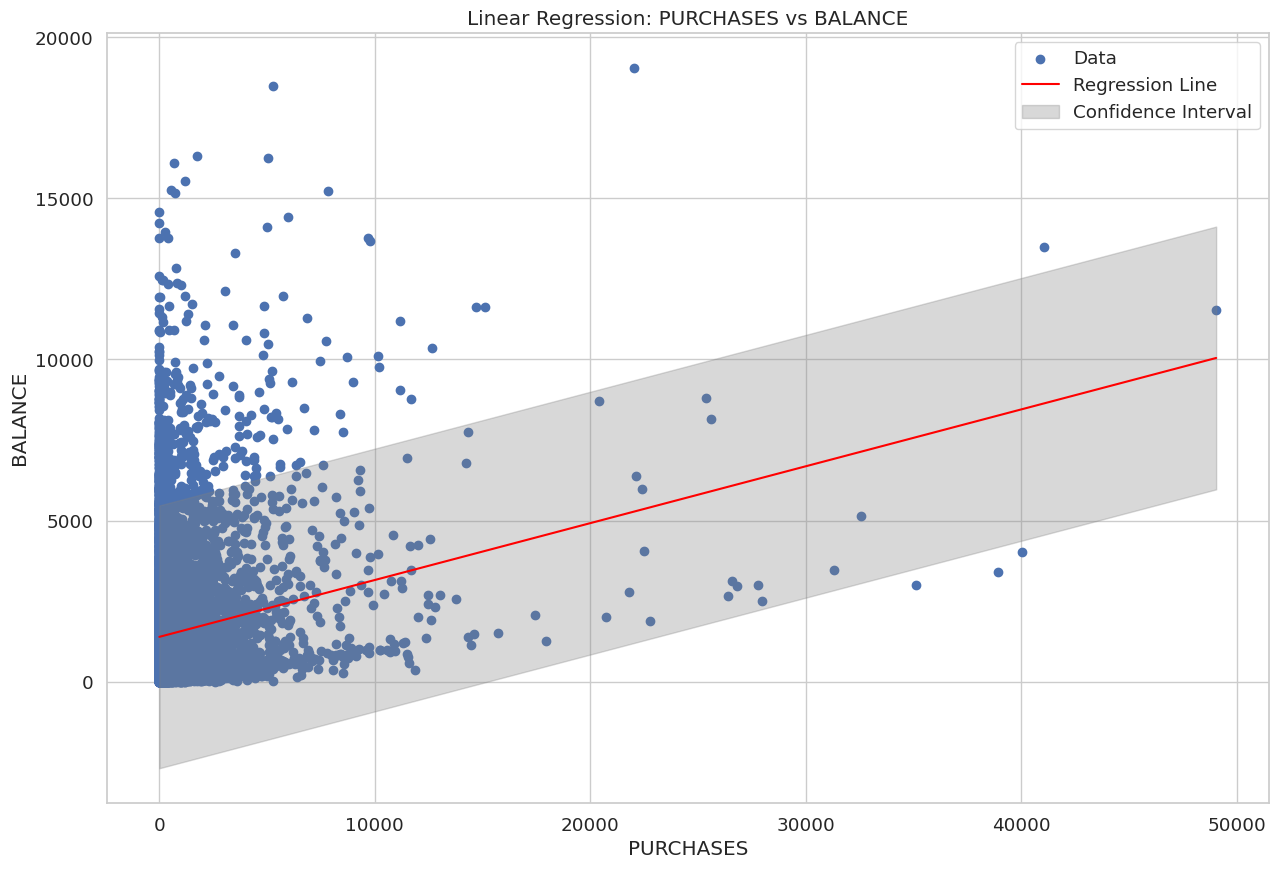

R-Squared Value: 0.03


In [33]:
plot_linear_regression(data_copy_filled,lr_model,'PURCHASES', 'BALANCE')

In [26]:
print(evaluate_fitting(data_copy_filled,'PURCHASES', 'BALANCE',lr_model))

0.03285545708007365
